# Descripción del Proyecto 
Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B. (Sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

# Análisis a realizar 
## Estudiar y comprobar los datos

- ¿Cuántos eventos hay en los registros?
- ¿Cuántos usuarios y usuarias hay en los registros?
- ¿Cuál es el promedio de eventos por usuario?
- ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?
- ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
- Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

## Estudiar el embudo de eventos

- Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
- Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.
- ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
- Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).
- ¿En qué etapa pierdes más usuarios y usuarias?
- ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

## Estudiar los resultados del experimento

- ¿Cuántos usuarios y usuarias hay en cada grupo?
- Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
- Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
- Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
- ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

# Importar librerías 


In [73]:
# Librerías para la manipulación de datos 
import pandas as pd 
import numpy as np 
import math
from datetime import datetime as dt
# Librería para análisis estadístico 
from scipy import stats as st 
# Librerías para la visualización de datos 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly_express as px 
import plotly.graph_objects as go

# Importar dataset 
## Descripción de los datos

Cada entrada de registro es una acción de usuario o un evento.

- `EventName`: nombre del evento.
- `DeviceIDHash`: identificador de usuario unívoco.
- `EventTimestamp`: hora del evento.
- `ExpId`: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

In [74]:
events = pd.read_csv('logs_exp_us.csv', dtype=({'ExpId':'category','EventName':'category','DeviceIDHash':'str'}), sep='\t')

# Preprocesamiento de datos 

In [75]:
# Ver la información general del df
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   EventName       244126 non-null  category
 1   DeviceIDHash    244126 non-null  object  
 2   EventTimestamp  244126 non-null  int64   
 3   ExpId           244126 non-null  category
dtypes: category(2), int64(1), object(1)
memory usage: 4.2+ MB


No se ven problemas mayores con el df, no hay valores ausentes, pero sería útil cambiar el nombre de las columnas para que sean mas convenientes y también se tendría que pasar los datos de la columna 'EventTimestamp' a tipo datetime ya que describe la hora del evento.

In [76]:
# Cambiar el nombre de las columnas 
events.columns = ['event_name', 'user_id', 'event_time', 'group']
# Mostrar cambio en las columnas 
events.head()

,event_name,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [77]:
# Verificar duplicados 
duplicates = events.duplicated().any()

if duplicates:
    print('Hay valores duplicados')
else:
    print('No hay valores duplicados')

Hay valores duplicados


El df si tiene valores duplicados, en este caso eso valores se descartarán 

In [78]:
# Eliminar valores duplicados del DataFrame 
events.drop_duplicates(inplace=True)

In [79]:
# Convertir la columna 'event_time' a formato de fecha y hora
events['event_datetime'] = pd.to_datetime(events['event_time'], unit='s')

# Crear una columna separada para las fechas
events['event_date'] = events['event_datetime'].dt.date

# Mostrar el DataFrame con las nuevas columnas
events

,event_name,user_id,event_time,group,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


# Estudiar y comprobar los datos 

## ¿Cuántos eventos hay en los registros?

In [80]:
# Calcular el total de eventos registrados usando .count()
total_events = events['event_name'].count()
print(f'Hay un total de {total_events} eventos registrados')

Hay un total de 243713 eventos registrados


## ¿Cuántos usuarios y usuarias hay en los registros?

In [81]:
# Calcular la cantidad de usuari@s únicos que están registrados
total_users = events['user_id'].nunique()
print(f'Hay un total de {total_users} usuarios y usuarias registradas')

Hay un total de 7551 usuarios y usuarias registradas


## ¿Cuál es el promedio de eventos por usuario?


In [82]:
# Calcular el promedio de eventos por usuario dividiendo el total de usuarios entre el total de usuari@s
mean_events_per_user = total_events / total_users
print(f'Se registra un promedio de {mean_events_per_user.__round__()} eventos por usuario')

Se registra un promedio de 32 eventos por usuario


## ¿Qué período de tiempo cubren los datos?


In [83]:
# Encontrar la fecha máxima y mínima 
min_date = events['event_date'].min()
max_date = events['event_date'].max()
print(f'El período de tiempo que cubren los datos va de: {min_date} hasta: {max_date}')

El período de tiempo que cubren los datos va de: 2019-07-25 hasta: 2019-08-07


Luego de sacar el período de tiempo que cubren los datos surgen distintas preguntas, entre ellas está: 

¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?: Para esto lo mejor sería crear un histograma que muestre la distribución de los datos.

Otra cosa que puede siceder es que los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Lo mejor en este caso es encontrar el momento en el que los datos comienzan a estar completos para así poder ignorar la sección anterior.


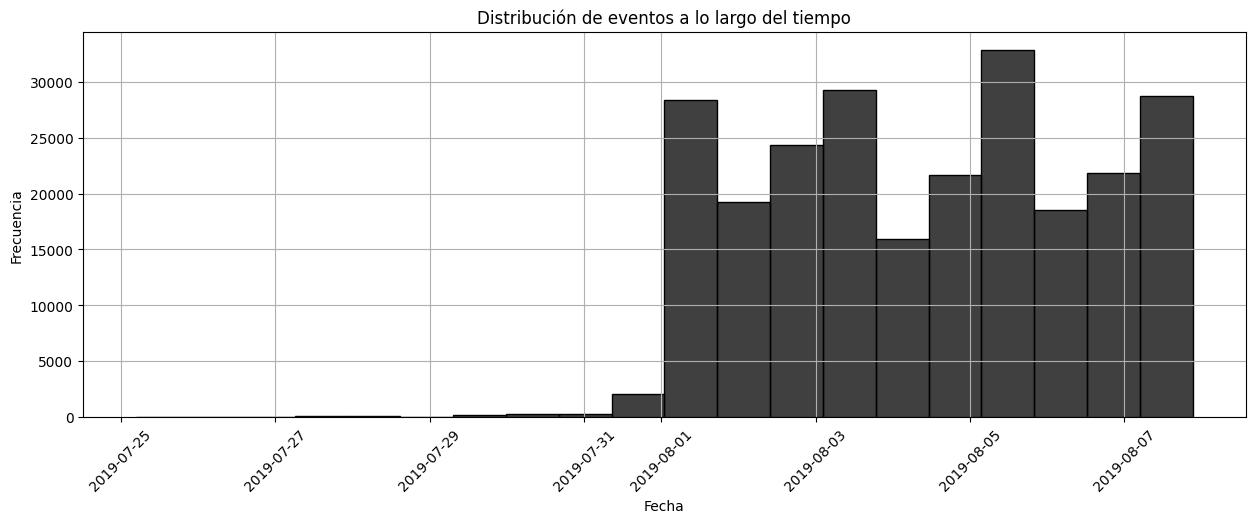

In [84]:
# Comenzar a crear el histograma 

# Ajustar el tamaño del histograma 
plt.figure(figsize=(15, 5))

# Crear histograma por fecha y hora
sns.histplot(events['event_datetime'], bins=20, color='black')
# Añadir título
plt.title('Distribución de eventos a lo largo del tiempo')
# Añadir un título a ambos ejes
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Gracias al histograma podemos ver que no existe una dsitribución normal a lo largo del período, vemos que básicamente no existen eventos registrados en la parte izq del gráfico cuando la comparamos con la derecha, también observamos que la diferencia comienza a partir del 1ro de Agosto, por lo que se verán con más detalles las últimas semanas de Julio y las primeras de Agosto.

Todo esto genera una pregunta más: ¿Qué periodo representan realmente los datos?

Para contestar esto usaremos el estudio más detallado de las semanas anteriormente mencionadas.

## ¿Qué período representan realmente los datos?

In [85]:
# Contar eventos en los días de las últimas semanas de Julio
jly_last_week_events = events[events['event_datetime'] <= '2019-07-31 23:59:59']['event_date'].value_counts()
# Contar los eventos en los días de la primera semana de Agosto 
agst_first_week_events = events[events['event_datetime'] > '2019-07-31 23:59:59']['event_date'].value_counts()
# Mostrar resultados 
print(jly_last_week_events,'\n','\n', agst_first_week_events)

event_date
2019-07-31    2030
2019-07-30     412
2019-07-29     184
2019-07-28     105
2019-07-27      55
2019-07-26      31
2019-07-25       9
Name: count, dtype: int64 
 
 event_date
2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
Name: count, dtype: int64


Con los resultados obtenidos se puede observar que hay una gran diferencia en la cantidad de eventos registrados la última semana de Julio y la primera de Agosto, en cuanto a la pregunta de ¿Qué periodo representan realmente los datos? se puede concluir que representan realmente la primera semana de Agosto, ya que esta elección cumple con una condición anterior que era encontrar el momento en el que los datos comienzan a estar completos para ignorar lo anterior y es que también se puede observar que durante esta primera semana de Agosto ningún día baja de los 30,000 eventos registrados.

In [86]:
# Filtrar el df original con las fechas a partir del 1ro de Agosto 
filtered_events = events[events['event_datetime'] > '2019-07-31 23:59:59']
# Ver el df filtrado
filtered_events

,event_name,user_id,event_time,group,event_datetime,event_date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


La decisión tomada abre las puertas a dos nuevas preguntas:
1. ¿Se perdieron muchos eventos y usuarios al excluir los datos más antiguos?
2. ¿Hay usuarios y usuarias de los 3 grupos experimentales? 

## ¿Se perdieron muchos eventos y usuarios al excluir los datos más antiguos?

In [87]:
# Calcular la cantidad de eventos que se perdieron y la proporción que representan de los eventos iniciales  
print(f'Al haber excluido los datos se perdieron {events['event_name'].count() - filtered_events['event_name'].count()} eventos, que equivalen a un: {round(
    ((events['event_name'].count() - filtered_events['event_name'].count()) / events['event_name'].count()) * 100, 2)}% de los eventos iniciales')
# Calcular la cantidad de usuari@s se perdieron y la proporción que representan de los usuarios iniciales
print(f'Al haber excluido los datos se perdieron {events['user_id'].nunique() - filtered_events['user_id'].nunique()} usuarios, que equivalen a un: {round(
    (events['user_id'].nunique() - filtered_events['user_id'].nunique()) / events['user_id'].nunique() * 100,2)}% de los usuarios iniciales')

Al haber excluido los datos se perdieron 2826 eventos, que equivalen a un: 1.16% de los eventos iniciales
Al haber excluido los datos se perdieron 17 usuarios, que equivalen a un: 0.23% de los usuarios iniciales


Los resultados muestran que la cantidad de datos que se excluyeron representan un porcentaje muy bajo de los datos totales, por lo que no significaría un problema.

## ¿Hay usuarios y usuarias de los 3 grupos experimentales?

In [88]:
# Sacar conteo de usuarios por grupo 
users_per_group = filtered_events.groupby('group', as_index=False).agg({'user_id':'nunique'})
users_per_group

C:\Users\User\AppData\Local\Temp\ipykernel_16964\962760143.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,group,user_id
0,246,2484
1,247,2513
2,248,2537


La tabla resultante nos muestra cuantos usuarios pertenecen a cada grupo, por lo que podemos confirmar que si tenemos usuarios y usuarias en los 3 grupos experimentales.

Se decidió crear un df con esta información con la idea de que podría ser útil más adelante para diferentes análisis.

# Estudiar el embudo de eventos 
Antes de iniciar con los estudios y análisis con los datos filtrados, se tiene que actualizar la cantidad de eventos y usuarios totales.

In [89]:
# Actualizar cantidad total de eventos 
total_events = filtered_events['event_name'].count()
# Actualizar cantidad total de usuarios 
total_users = filtered_events['user_id'].nunique()

## Frecuencia de suceso de los eventos registrados 

In [90]:
# Obtener la frecuencia de ocurrencia de cada evento
event_counts = events['event_name'].value_counts().reset_index()
event_counts.columns = ['Event', 'Frequency']

# Ordenar los eventos por frecuencia de ocurrencia
event_counts = event_counts.sort_values(by='Frequency', ascending=False)


In [91]:
# Crear el gráfico circular con estilo diferente y tamaño más pequeño
fig = px.pie(event_counts, values='Frequency', names='Event', title='Frecuencia de Eventos', width=700, height=400, color_discrete_sequence=px.colors.sequential.RdBu, template='plotly_dark')

# Mostrar el gráfico
fig.show()

El gráfico muestra que el evento que más registro tiene es el de la página principal, seguido de la página con las ofertas, luego la del carrito y por último la página referente al pago. Este orden parece ser correcto ya que esa secuencia es la lógica para un usuario que termina comprando algo en la página.

## Cantidad de usuarios y usuarias que realizaron cada evento

In [92]:
# Calcular la cantidad usuarios que participaron en cada evento 
# Guardarlo en la variable 'users_per_event'
users_per_event = filtered_events.groupby('event_name',as_index=False).agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
users_per_event

C:\Users\User\AppData\Local\Temp\ipykernel_16964\3935545382.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,event_name,user_id
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


Acá podemos observar que se mantiene la misma secuencia que con la frecuencia de los eventos, se mantiene el mismo orden y la disminución de usuarios a lo largo de las páginas permite ir viendo el embudo.

### Proporción de usuarios y usuarias que realizaron la acción al menos una vez 

In [93]:
# Calcular la proporción de usuarios y usuarias que realizaron cada acción al menos una vez
users_per_event['proportion'] = users_per_event['user_id'] / total_users

users_per_event

,event_name,user_id,proportion
1,MainScreenAppear,7419,0.984736
2,OffersScreenAppear,4593,0.609636
0,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737
4,Tutorial,840,0.111495


Este resultado nos proporciona información sobre la penetración de cada acción en relación con el total de usuarios y usuarias en el conjunto de datos:

MainScreenAppear: Aproximadamente el 98.47% de los usuarios y usuarias realizaron esta acción al menos una vez. Esto sugiere que la mayoría de los usuarios y usuarias interactúan con la pantalla principal de la aplicación.

OffersScreenAppear: Alrededor del 60.96% de los usuarios y usuarias realizaron esta acción al menos una vez. Esto indica que una proporción considerable de usuarios y usuarias interactúan con la pantalla de ofertas.

CartScreenAppear: Cerca del 49.56% de los usuarios y usuarias realizaron esta acción al menos una vez. Esto muestra que alrededor de la mitad de los usuarios y usuarias agregan productos al carrito en la aplicación.

PaymentScreenSuccessful: Aproximadamente el 46.97% de los usuarios y usuarias realizaron esta acción al menos una vez. Esto sugiere que una cantidad significativa de usuarios y usuarias completan el proceso de pago en la aplicación.

Tutorial: Solo alrededor del 11.15% de los usuarios y usuarias realizaron esta acción al menos una vez. Esto indica que una minoría de usuarios y usuarias interactúan con el tutorial de la aplicación.

En resumen, este análisis nos brinda una comprensión de la participación de los usuarios y usuarias en diferentes acciones de la aplicación, lo que puede ser útil para identificar áreas de enfoque o mejora en la experiencia del usuario.

## ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? 

Aunque todos los eventos muestran cantidades diferentes de usuarios en cada uno, es lógico asumir que todos hacen parte de una sola secuencia, la cual podría ser: 

Primero los visitantes miran el tutorial, luego se van a la página principal que los lleva a la oferta, con una oferta que les llamó la antención van a la página del carrito para terminar la compra e ir a la página de pago exitoso.

1. Tutorial:
A pesar de ser el evento con menos frecuencia y usuarios es lógico asumir que este es lo primero que hacen los usuarios y usuarias nuevos que no logran entender del todo la página, pero el ver el la proporción tan baja de usuarios que lo realizan pueden tomarse suposiciones positivas como que el sitio está bien hecho y organizado por lo que la mayoría de usuarios no sienten la necesidad de mirar un tutorial.

2. Main Screen: 
Luego del tutorial, lo más probable es que lleguen a esta página y al estar en la página principal pueden ver todo el contenido que ofrece la misma.

3. Oferrs Screen: Luego de ver el contenido general de la página principal, llegan a una oferta que les llamó la atención.

4. Cart Screen: Después de seleccionar la oferta que les llamó la atención llegan al carrito para ver sus productos seleccionados junto con la descripción del mismo.

5. Payment Screen: La última de todas, los usuarios llegan a esta una vez hayan comprado los productos que tenían en el carrito.
 

##  Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente.

In [118]:
# Calcular la proporción de usuarios que van de la Main a la Offer page 
main_to_offer = (int(users_per_event['user_id'][users_per_event['event_name'] == 'OffersScreenAppear']) / int(users_per_event['user_id'][users_per_event['event_name'] == 'MainScreenAppear'])) * 100
# Redondear resultado 
main_to_offer = main_to_offer.__round__(2)
# Calcular la proporción de usuarios que van de la Offer a la Cart page
offer_to_cart = (int(users_per_event['user_id'][users_per_event['event_name'] == 'CartScreenAppear']) / int(users_per_event['user_id'][users_per_event['event_name'] == 'OffersScreenAppear'])) * 100
# Redondear resultado 
offer_to_cart = offer_to_cart.__round__(2)
# Calcular la proporción de usuarios que van de la Cart a la Payment Page 
cart_to_payment = (int(users_per_event['user_id'][users_per_event['event_name'] == 'PaymentScreenSuccessful']) / int(users_per_event['user_id'][users_per_event['event_name'] == 'CartScreenAppear'])) * 100
# Redondear el resultado 
cart_to_payment = cart_to_payment.__round__(2)

C:\Users\User\AppData\Local\Temp\ipykernel_16964\1099883739.py:2: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\User\AppData\Local\Temp\ipykernel_16964\1099883739.py:6: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\User\AppData\Local\Temp\ipykernel_16964\1099883739.py:10: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [120]:
print(f'Proporción de usuarios que pasan de la página principal a la de ofertas: {main_to_offer}%')
print(f'Proporción de usuarios que pasan de la página de ofertas a la del carrito: {offer_to_cart}%')
print(f'Proporción de usuarios que pasan de la página del carrito a la del pago realizado: {cart_to_payment}%')

Proporción de usuarios que pasan de la página principal a la de ofertas: 61.91%
Proporción de usuarios que pasan de la página de ofertas a la del carrito: 81.3%
Proporción de usuarios que pasan de la página del carrito a la del pago realizado: 94.78%


C:\Users\User\AppData\Local\Temp\ipykernel_16964\4068004803.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will nee

Text(0, 0.5, 'Proporción de usuarios')

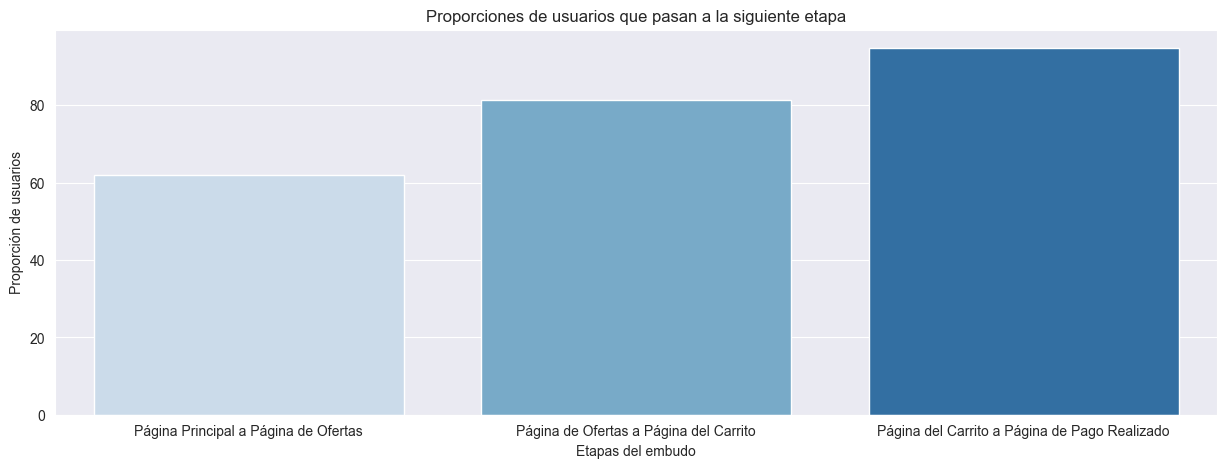

In [177]:
# Ajustar tamaño del gráfico 
plt.figure(figsize=(15,5))
# Crear título 
plt.title('Proporciones de usuarios que pasan a la siguiente etapa')
# Crear gráfico de barras
sns.set_style('darkgrid')
sns.barplot(x = ['Página Principal a Página de Ofertas', 'Página de Ofertas a Página del Carrito', 'Página del Carrito a Página de Pago Realizado'], y=[main_to_offer,offer_to_cart,cart_to_payment], palette="Blues")
# Poner título a los ejes 
plt.xlabel('Etapas del embudo')
plt.ylabel('Proporción de usuarios')


### ¿En qué etapa se pierden más usuarios y usuarias?
Con los resultados obtenidos podemos concluir que el problema de retención esta en la primera etapa del embudo, que toma a los usuarios en la página principal y los manda a la página con las ofertas, esta etapa tiene el porcentaje más bajo de todas con un 61.91% de usuarios que vienen de la página principal, resolver esto puede significar mejores números para la tienda ya que las últimas dos etapas que trabajan directamente con las ventas tienen muy buenos porcentajes de retención de usuarios. 

## ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [174]:
full_filter_user = ((filtered_events[filtered_events['event_name']=='PaymentScreenSuccessful']['user_id'].nunique()) / (filtered_events[filtered_events['event_name'] == 'MainScreenAppear']['user_id'].nunique())) * 100
full_filter_user = full_filter_user.__round__(2)
print(f'Porcentaje de usuarios y usuarias que completaron todo el recorrido: {full_filter_user}%')

Porcentaje de usuarios y usuarias que completaron todo el recorrido: 47.7%


# Estudiar los resultados del experimento 

## ¿Cuántos usuarios y usuarias hay en cada grupo?
Para contestar esto se utilizará una tabla que se realizó anteriormente cuando se excluyeron los datos más antiguos, donde agrupamos los diferentes grupos con la cantidad de usuarios y usuarias únicos en cada uno

In [178]:
users_per_group

,group,user_id
0,246,2484
1,247,2513
2,248,2537


Se observan cantidades similares de usuarios para cada grupo, pero no terminan de ser 100% iguales, se tendría que estudiar si hay una diferencia estadísticamente significativa entre las muestras

## Comprobar diferencia estadísticamente significativa entre los grupos de control 